# The Hasselmann model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

if 'google.colab' in str(get_ipython()):
  print('Running on CoLab, need to install multitaper')
  %pip install multitaper
else:
  print('Not running on CoLab')
from multitaper import mtspec
from multitaper import mtcross

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# 1. Mathematical Preliminaries

## Fourier Transforms 

* Fourier Transform, and it's inverse, which can be written either in
terms of frequency $f$ or angular freuency $\omega.$ 

$$ \mathscr{F}\left\{ X(t)\right\} =\int_{-\infty}^{+\infty}X(t)e^{-2\pi ift}dt=\tilde{X}\left(f\right)$$ 

$$
\mathscr{F}\left\{ X(t)\right\} =\int_{-\infty}^{+\infty}X(t)e^{-i\omega t}dt=\tilde{X}\left(\omega\right)
$$

$$
\mathscr{F}^{-1}\left\{ \tilde{X}\left(f\right)\right\} =\int_{-\infty}^{+\infty}\tilde{X}\left(f\right)e^{2\pi ift}df=X\left(t\right)
$$

$$
\mathscr{F}^{-1}\left\{ \tilde{X}\left(\omega\right)\right\} =\frac{1}{2\pi}\int_{-\infty}^{+\infty}\tilde{X}\left(\omega\right)e^{i\omega t}d\omega=X\left(t\right)
$$

* Unless otherwise noted, we will use $X$ to denote time-domain functions
$X(t)$ and $\tilde{X}$ to denote frequency domain functions, $\tilde{X}\left(f\right)$
or $\tilde{X}\left(\omega\right)$. We will use the following notation
two denote two quantities are related through a Fourier/Invers Fourier
transformation:

$$
X(t)\overset{\mathscr{F}}{\longleftrightarrow}\tilde{X}(f)
$$

* **Nyquist frequency:** for discrete time-series evaluated at
discrete time-steps $t_{i}$ separated by $\Delta t=t_{i+1}-t_{i}$
the Fourier Transform can only be evaluated at frequencies up to the
sampling frequency, also called the Nyquist frequency 

$$
f_{N}=\frac{1}{2\Delta t}.
$$

It is not possible to estimate energy at freuencies higher than the
Nyquist frequncy without more finely resolved data. 

## Spectral Density \& Covariance

Here we will refresh some definitions and properties of Fourier Analysis.
The math we use will not be rigurous, but it will be, hopefully, consistent. 

Wikipedia has some decent coverage of spectral analysis.

* The **cross power spectral density** of two variables is:

$$
S_{XY}\left(\omega\right)=\left\langle \tilde{X}\left(\omega\right)\tilde{Y}^{*}\left(\omega\right)\right\rangle =\lim_{T\rightarrow\infty}\frac{1}{T}E\left[\tilde{X}\left(\omega\right)\tilde{Y}^{*}\left(\omega\right)\right]
$$

where $T$ is the total length of the signal and $*$ denotes a complex
conjugate. In practice, we won't have to deal with the limit or the
expectation, as everything will eventually be written in terms of
the power spectral density $\tilde{s}^{2}$ of some noise forcing
$\eta(t)$, where $\tilde{s}_{\eta}^{2}\left(\omega\right)=\left\langle \tilde{\eta}\left(\omega\right)\tilde{\eta}^{*}\left(\omega\right)\right\rangle $.
As long as we are careful to properly scale the spectrum of the noise,
the only other thing we need is the fact that the bracket notation
$\left\langle \cdot\right\rangle $ is linear. 

* The spectral density described above is what we will call the **process**
spectral density. I.e. this is a parameter of the process. You can
also think of it as the *true*spectral density of the underlying
process that generated the data. When working with real data, we will
only have access to finite samples of the processes $X(t)$
and  $Y(t)$ defined over a finite interval $T$. Thus, all
we can do is get an *estimate* of the spectrum, which we will
call the **sample** spectrum. For now we won't worry about how
to compute these estimates, and just use a library that estiamtes
these quantities for us. 

* The **power spectral density (PSD}**, or the auto-spectrum of
a stochastic process $X$ is: 

$$
P_{X}\left(f\right)=S_{XX}\left(f\right)=\left\langle \tilde{X}\left(f\right)\tilde{X}^{*}\left(f\right)\right\rangle =\lim_{T\rightarrow\infty}\frac{1}{T}E\left[\tilde{X}\left(f\right)\tilde{Y}^{*}\left(f\right)\right]
$$

* The **cross-covariance** function. At least for now, we will
be dealing with anomalies from a mean, so we can assume $E(X(t))=E(Y(t))=0$.
If ths is the case, the cross-covariance becomes equal to the cross-correlation
function, and they both become

$$
C_{XY}(\tau)=\text{Cov}\left(X(t),Y(t+\tau)\right)=E\left[X(t)Y(t+\tau)\right]=\lim_{T\rightarrow\infty}\frac{1}{T}\int_{-\infty}^{\infty}X(t)Y(t+\tau)dt
$$

* **White noise:** process is an uncorrelated process, i.e. the
covariance is only non-zero at zero lag. If $\delta_{\tau}$ is a
delta-function centered on zero, then:

$$
C_{\eta\eta}\left(\tau\right)=E\left[X(t)Y(t+\tau)\right]=\delta_{\tau}\sigma^{2}
$$


## Useful Properties and Theorems

In practice, our derivations will make use of the following properties
of the Fourier Transform, Spectral density, and covariance functions

* Fourier Transform of a time-derivative

$$
\boxed{\mathscr{F}\left\{ \frac{dx(t)}{dt}\right\} =i\omega\tilde{X}(\omega)}
$$

* Linearity of cross spectral density:

$$
\boxed{\left\langle a\left(\tilde{X}+\tilde{Y}\right)\tilde{Z}\right\rangle =a\left\langle \tilde{X}\tilde{Z}\right\rangle +a\left\langle \tilde{Y}\tilde{Z}\right\rangle }
$$

* Expected auto-cross-spectrum (i.e. power spectrum) of a white noise
process is a constant. In fact, this could be an alternative definition
of ``white noise'', with the $\delta$-function correlaton being
a consequence. If $\eta(t)$ is a white-noise process:

$$
\boxed{S_{\eta\eta}\left(\omega\right)=\left\langle \tilde{\eta}(\omega)\cdot\tilde{\eta}^{*}(\omega)\right\rangle =\tilde{s}_{\eta}^{2}}
$$

* Expected cross-spectrum of two independent processes is zero

$$
\boxed{S_{XY}\left(\omega\right)=\left\langle \tilde{X}(\omega)\cdot\tilde{Y}(\omega)\right\rangle =0}
$$

* **Wiener-Khinchin theorem** linking lagged-covariance with cross-spectrum:

$$
\boxed{C_{XY}(\tau)\overset{\mathscr{F}}{\longleftrightarrow}S_{XY}(\omega)}
$$

* **Parseval's Theorem** is equivalent to the Wiener-Khinchin theorem
at $\tau=0$, where $C_{XX}\left(0\right)=var\left(X\right)$. Still,
it is important enough that it is worth discussing it on its own:

$$
\boxed{\sigma_{X}^{2}=var(X)=\int_{-\infty}^{\infty}S_{XX}\left(f\right)df}
$$


# 2. The Hasselmann model



## The Physical Basis: 1-Box model

Consider the evolution of the energy budget of a linear system described
by temperature $T(t)$ , and forced by an external heat-flux $F(t).$
Assuming the system has thermal inertia $C$, we can write the general
evolution of the model as: 

$$
C\frac{dT}{dt}=Q\left(T\right)+F(t)
$$

where $Q(T)$ are heat fluxes that are caused as a response to temperature
fluctuations. 

Now consider a steady-state $T_{0}$ with steady-state forcing $F_{0}$,
such that $dT/dt=0$ and $Q(T_{0})=F_{0}$. Now consider small deviations
in forcing $\Delta F(t)=F(t)-F_{0}$ that lead to small deviations
from steady state in temperature $\Delta T(t)=T(t)-T_{0}$ such that
$\Delta T/T_{0}\ll1$. We can linearize the system thus:

$$
C\frac{dT}{dt}=Q\left(T_{0}\right)+\left.\frac{dQ}{dT}\right|_{T_{0}}\Delta T+\mathcal{O}\left(\left(\frac{\Delta T}{T_{0}}\right)^{2}\right)+F_{0}+\Delta F(t)
$$

$$
C\frac{d\Delta T}{dt}=-\lambda\Delta T+\Delta F\left(t\right)
$$

where $\lambda$ is usually called the feedback. It can also be thought
of as a restoring rate, or a damping rate. A larger value for $\lambda$
means that an anomaly $\Delta T$ will engender a larger negative
heat flux -$\lambda\Delta T$ that will tend to quickly damp the $\Delta T$
anomaly. I've written $\lambda=-dQ/dt$ because almost all the physical
systems encountered in earth-sciences will have negative feedback.
Having a positive feedback ($dQ/dt>0)$ Implies the system is unstable
and will blow up when taken out of its equilibrium point $T_{0}.$
Thus, in our convention, $\lambda$ will usually have positive values
for a stable system. That being said, signs conventions vary wildly,
and often times you will encounter $\lambda=dQ/dt$ with $\lambda$
taking negative values for a stable system. 

The system will be characterized by two important parameters: (1)
The first is the the equilibrium Sensitivity. At equilibrium:

$$
\frac{dT}{dt}=0\Rightarrow\frac{\Delta T}{\Delta F}=\frac{1}{\lambda},
$$

and (2) the characteristic time scale $\tau_{0}$:

$$
\boxed{\tau_{0}=\frac{C}{\lambda}}
$$

For the rest of the notes, we will drop the $\Delta$ and assume that
$T,F$ and other variables represent small deviations from a steady
state $T_{0},F_{0}.$ The equation for the system can be written as

$$
\boxed{C\frac{dT(t)}{dt}=-\lambda T(t)+F\left(t\right)}
$$
or, equivalently as:

$$
\boxed{\tau_{0}\frac{dT(t)}{dt}=-T(t)+\frac{1}{\lambda}F\left(t\right)}
$$

This is just a simple 1-dimensional linear differential equation.
The interesting part about it is that the forcing term $F(t)$ is
random. In the classic Hasselmann paradigm, $F(t)$ is assumed to
be uncorrelated white noise. 

This type of box models are ubiquitous in Earth Sciences. The original
Hasselmann model was used to represent variations in surface ocean
temperatures, under the influece of heat exchanges with the atmosphere.
The $F(t)$ term represented weather anomalies which, on time-scales
longer than the usual time-scale of weather phenomena (<2 weeks) could
be considered to be random noise. In classical physics, this equation
is called a Langevin equation or, in a slightly different form, an
Orsten-Uhlenbeck process. 




## Discretizing the Hasselmann model for simulations

In this notebook we simulate some examples of the Hasselmann model and visualizing the spectrum. In order to simulate the above differential equation numerically,
we have to discretize it. Taking a simple Forward-Euler finite difference
scheme we can write:

$$
C\frac{T_{n}-T_{n-1}}{\Delta t}=-\lambda T_{n-1}+F_{n}
$$

$$
T_{n}=\left(1-\frac{\Delta t\lambda}{C}\right)T_{n-1}+\frac{\Delta t}{C}F_{n}
$$
The discrete version of the Hasselmann model thus becomes: 

$$
T_{n}=\phi T_{n-1}+\varepsilon_{n}
$$
with: 

$$
\tau_{0}=\frac{C}{\lambda};\;\;\;\phi=1-\frac{\Delta t}{\tau_{0}};\;\;\;\varepsilon_{n}=\frac{\Delta t}{\tau_{o}}\frac{1}{\lambda}F_{n};
$$

## The power spectrum

### Spetrum of white noise forcing
To simulate the Hasselmann model we will need to choose some values of $\tau_{0},\lambda$ and decide on the variance $\sigma_{F}^{2}$ of the white noise process $F_{n}$. We will also need to choose a time-step $\Delta t$ to discretize the differential equation. 


First, let's visualize a white noise process, $F_n$, which we'll need to force the rest of the model. 

**Spectral estimators**: to estimate the power spectra of a sample of $F_n$ we will use the [multitaper](https://multitaper.readthedocs.io/en/latest/) python package. Since our data are real, the spectra will be symmetric around 0, so we will generally only plot the positive frequencies. 

In [3]:
# Set parameters
dt=1/12;     #time-scale. Let's say time is in years, and the time-step is 1 month, so 1/12 years.
T=100        # total integration time [years]
sigma_F=2    # variance of the forcing

# time-vector
t=np.arange(0,T,dt)
N=len(t)

#sample a gaussian white noise process (each F_n is independent and identically distributed, or i.i.d.).
F=stats.norm.rvs(loc=0,scale=sigma_F,size=N)


# Compute the spectral estimates
out=mtspec.MTSpec(F,nw=3,dt=dt,kspec=3)
f=out.freq       # freuencies
S_FF=out.spec    # power spectra
S_FF=S_FF[f>0]         # keep positive frequencies
f=f[f>0]

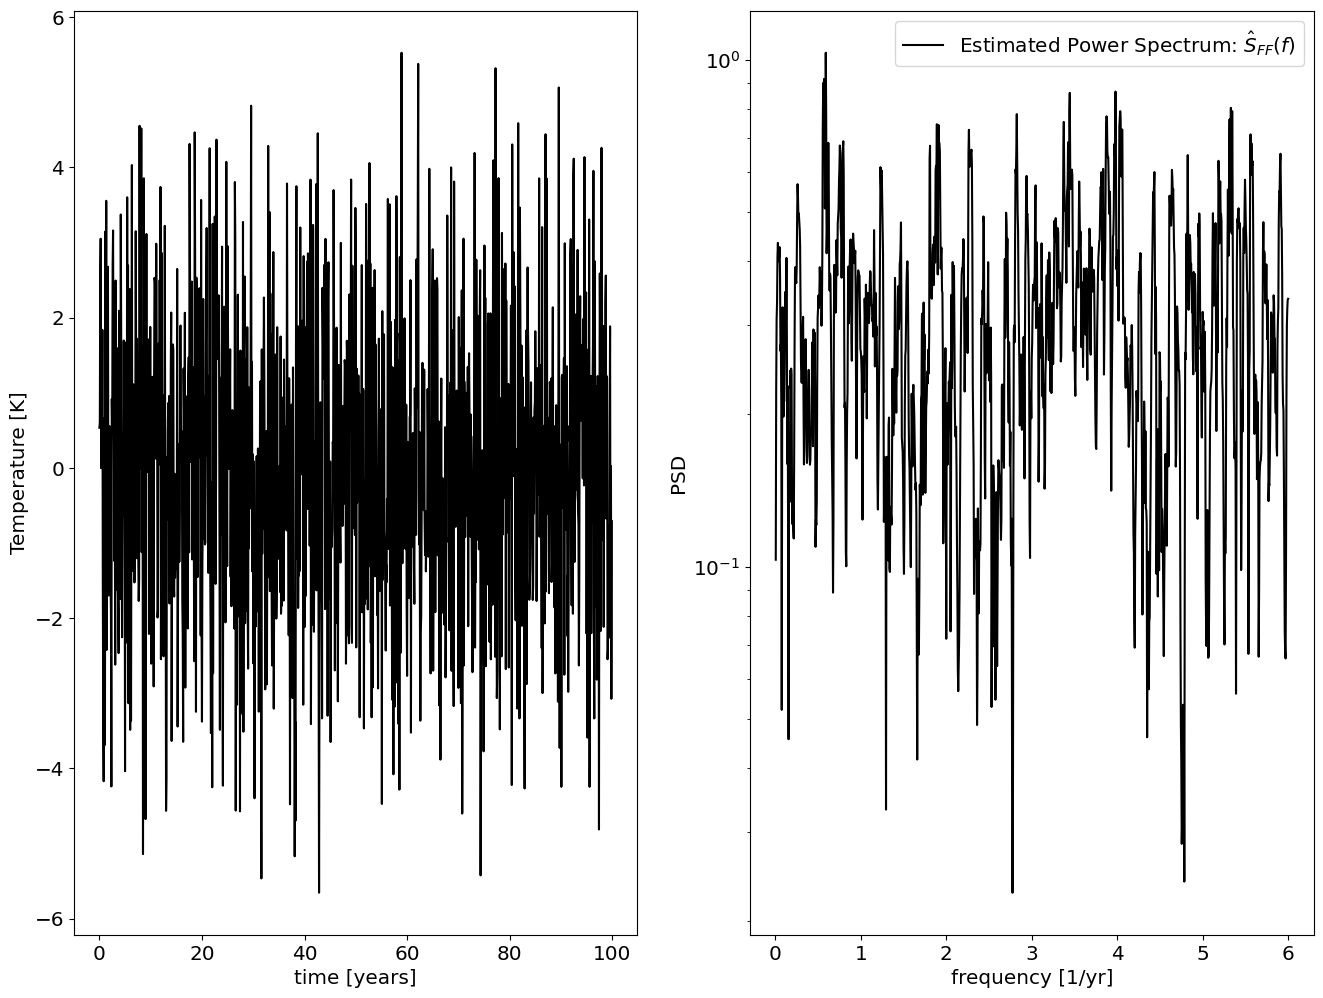

In [4]:
#Plots
plt.figure(figsize=[16,12]);
plt.subplot(1,2,1)
plt.plot(t,F,'k')
plt.xlabel('time [years]')
plt.ylabel('Temperature [K]')

plt.subplot(1,2,2)
plt.plot(f,S_FF,'k',label=r'Estimated Power Spectrum: $\hat S_{FF}(f)$')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel('frequency [1/yr]')
plt.ylabel('PSD')
plt.legend()


### Visualize the power spectrum of a Hasselmann model

Now let's simulate a Hasselmann Model. 

You should play around and change the correlation time scale, $\tau_0$, the forcing variance, and the feedback and see how the spetrum changes (you may need to keep note of the axis limits). 

In [5]:
dt=1/12;     #time-scale. Let's say time is in years, and the time-step is 1 month, so 1/12 years.
T=500        # total integration time [years]
sigma_F=2    # variance of the forcing
tau_0= 3       # time-scale tau=C/lambda [years]
lam= 7       # feedback lambda

# time-vector
t=np.arange(0,T,dt)
N=len(t)

#sample a gaussian white noise process (each F_n is independent and identically distributed, or i.i.d.).
F=stats.norm.rvs(loc=0,scale=sigma_F,size=N)

# calculate phi and eps for the discretization
phi=   1-dt/tau_0
eps = (dt/tau_0/lam)*F;

## Simulate the Hasselmann model
#pre-allocate
T=np.zeros(N)

for n in range(1,N):
            T[n]=phi*T[n-1]+eps[n]

out=mtspec.MTSpec(T,nw=3,dt=dt,kspec=3)
f=out.freq
S_TT=out.spec
S_TT=S_TT[f>0]
f=f[f>0]

Let's now plot the temperature time-series as well as the power spectrum and the autocorrelation function. We will use a log-log plot for the power spectrum. 

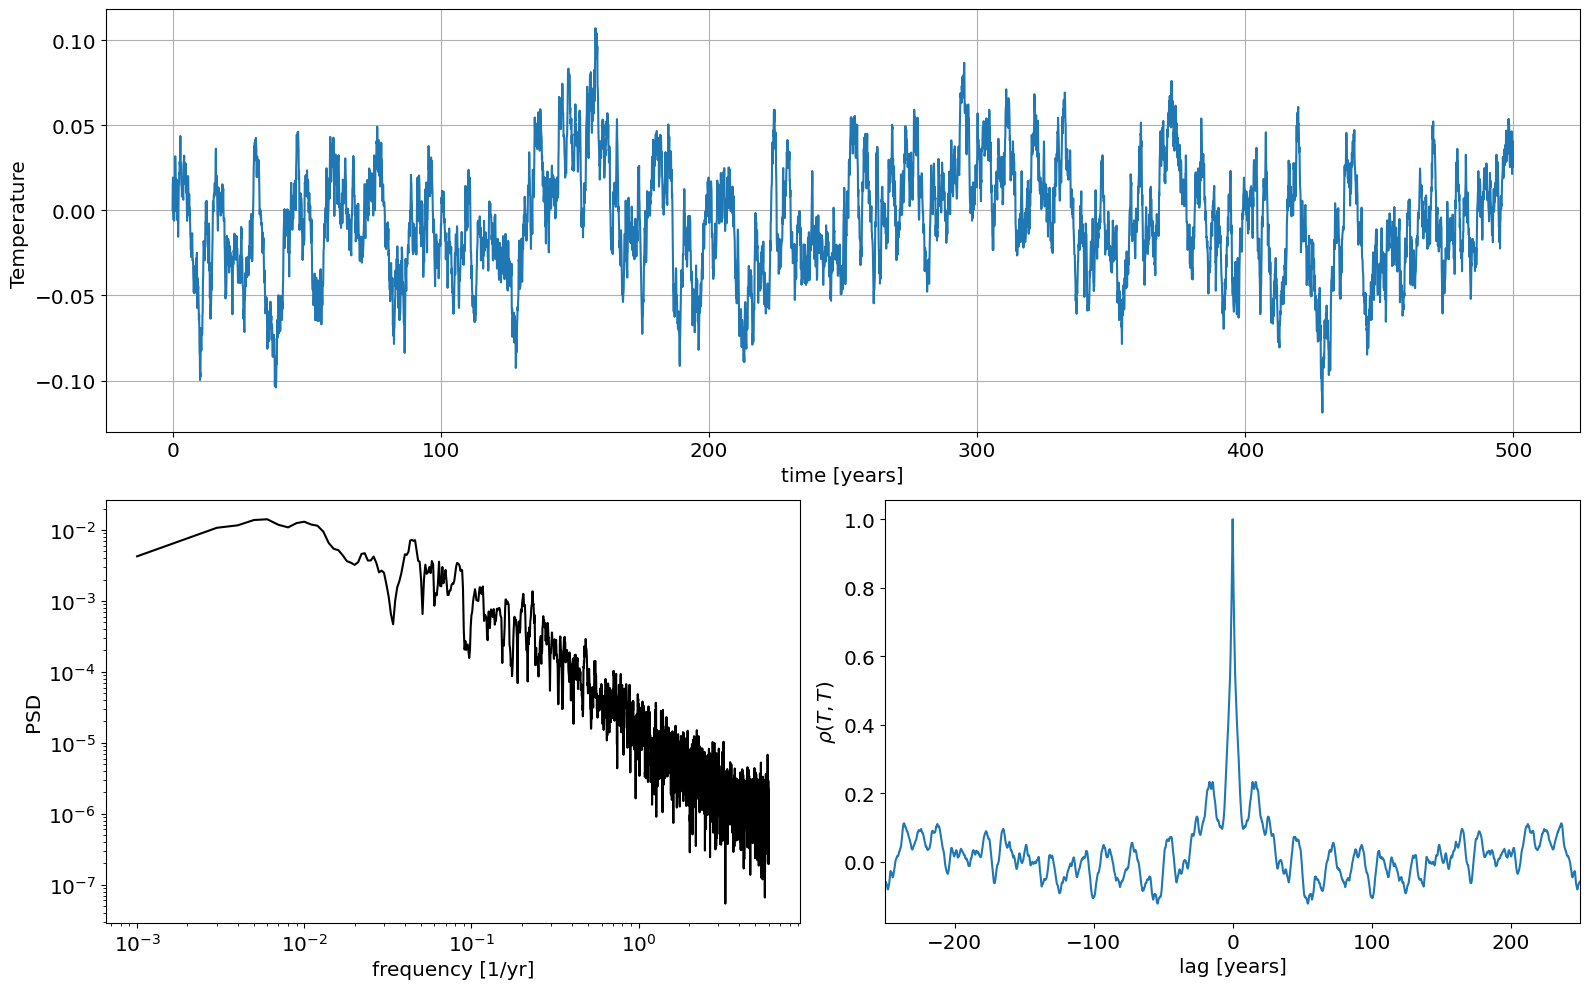

In [6]:
# Plots

plt.figure(figsize=[16,10]);

plt.subplot(2,1,1)
    
plt.plot(t,T,'-')
plt.grid()
plt.xlabel('time [years]')
plt.ylabel('Temperature ')

plt.subplot(2,2,3)
plt.plot(f,S_TT,'k',label=r'Estimated Power Spectrum: $\hat S_{FF}(f)$')

plt.xlabel('frequency [1/yr]')
plt.ylabel('PSD')

plt.xscale('log')
plt.yscale('log')

# Plot autocorrelation function
plt.subplot(2,2,4)

acf=np.correlate(T,T,mode='full')
acf=acf/np.max(acf)
lags=np.arange(-N+1,N)

plt.plot(lags*dt,acf)
plt.xlabel('lag [years]')
plt.ylabel(r'$\rho(T,T)$')

plt.xlim(-N*dt/2,N*dt/2)


plt.tight_layout()

### Spectrum as a function of parameters

The cell below plots time series, power spectra and auto-correlation functions for different values of the parameters. 

Note that in the code below we prescribe the variance of the temperature time-series, rather than of the forcing. 

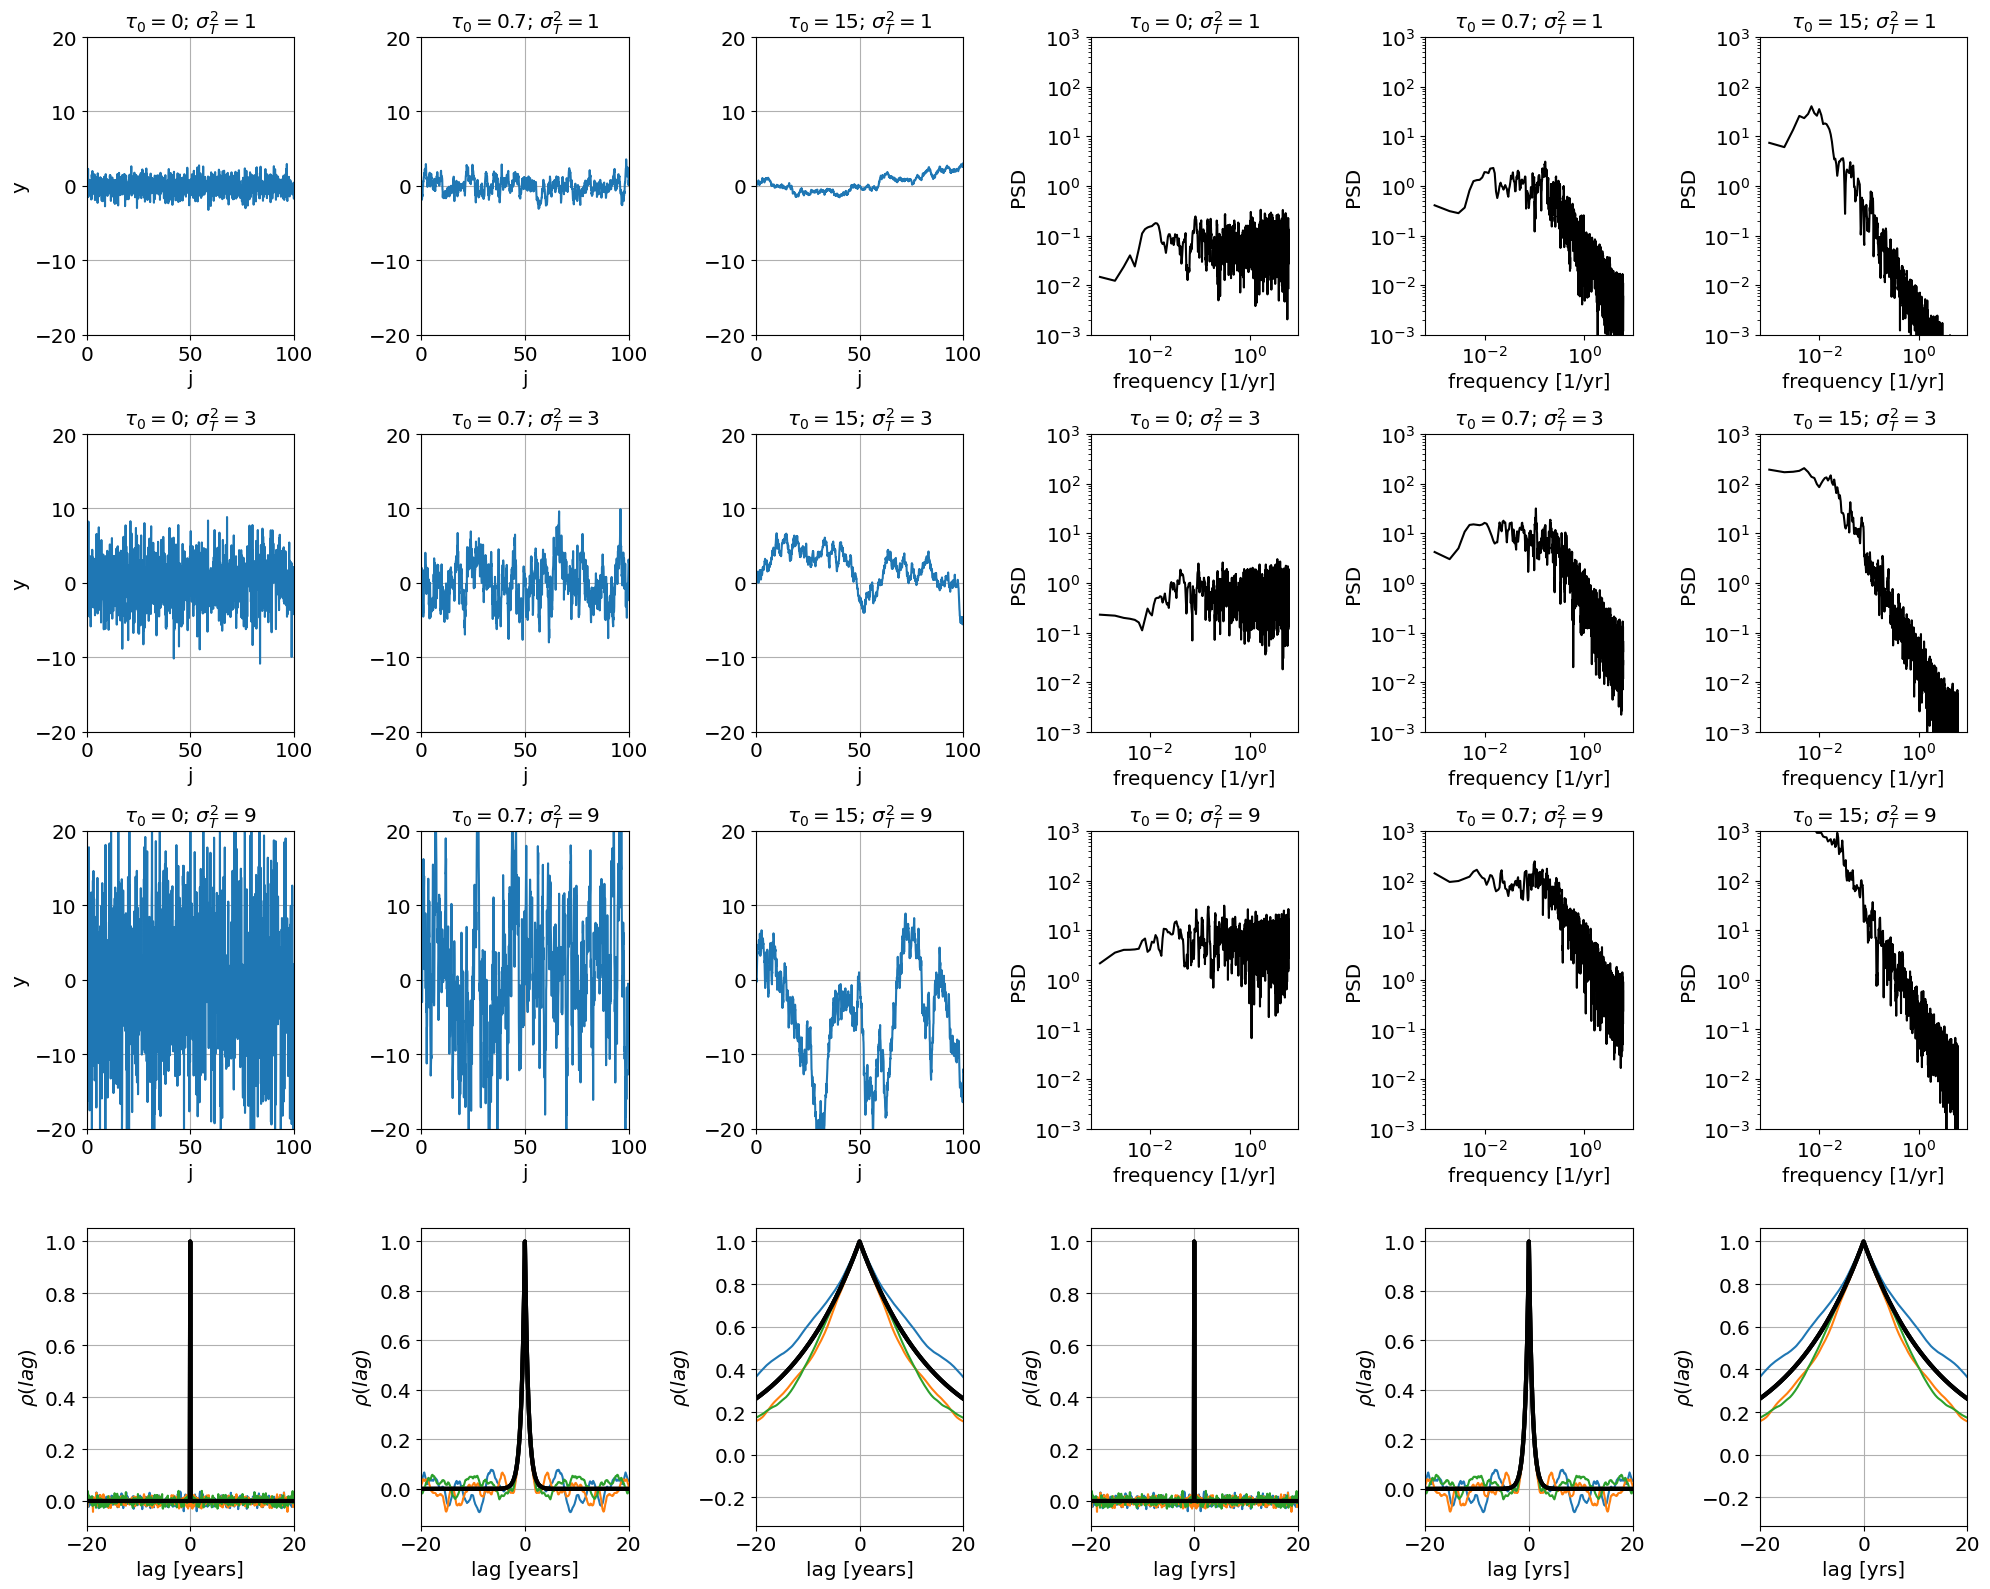

In [7]:
#Discrete time series
dt=1/12;
T=500

sigma_vec=[1,3,9];
tau_vec=[0,0.7,15];

# Time Domain
t=np.arange(0,T,dt)
N=len(t)


plt.subplots(4,6,figsize=[20,16])
for ind_sigma in range(3):
    for ind_tau in range(3):
        # autocorrelation coefficient & total variance of the AR(1) process
        tau_0=tau_vec[ind_tau]
        sigma_T=sigma_vec[ind_sigma];
        
        if ind_tau==0:
            phi=0;
        else:
            phi=1-dt/tau_0
        
        #pre-allocate T
        T=np.zeros(N)

        ## Simulate AR1 process: note that the variance of the noise doesn't matter nowo, since we will rescale X)
        eps=stats.norm.rvs(loc=0,scale=1,size=N);
        for j in range(1,N):
            T[j]=phi*T[j-1]+stats.norm.rvs(loc=0,scale=1);
        
        #rescale X to have a given variance
        T=T*sigma_T/np.std(T)



        out=mtspec.MTSpec(T,nw=3,dt=dt,kspec=3)
        f=out.freq
        S_TT=out.spec
        S_TT=S_TT[f>0]
        f=f[f>0]

        acf=np.correlate(T,T,mode='full')
        acf=acf/np.max(acf)
        lags=np.arange(-N+1,N)
        
        ## Make Plots
    
        subplot_ind=6*(ind_sigma)+(ind_tau+1)
        plt.subplot(4,6,subplot_ind)
    
        plt.plot(t,T,'-')
        #plt.hlines(0,0,N,'r')
        plt.grid()
        plt.ylim(-20,20)
        plt.title(r'$\tau_0=$'+str(round(tau_0,2))+r'; $\sigma^2_T=$'+str(round(sigma_vec[ind_sigma])))
        plt.xlabel('j')
        plt.xlim(0,100)
        if ind_tau==0:
            plt.ylabel('y')

        subplot_ind=6*(ind_sigma)+3+(ind_tau+1)
        plt.subplot(4,6,subplot_ind)
        plt.plot(f,S_TT,'k',label=r'Estimated Power Spectrum: $\hat S_{FF}(f)$')
        #plt.hlines(sigma_eps**2*dt,np.min(f),np.max(f),'r',label=r'Theoretical Power Spectrum: $S_{FF}=$constant')
        plt.title(r'$\tau_0=$'+str(round(tau_0,2))+r'; $\sigma^2_T=$'+str(round(sigma_vec[ind_sigma])))
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('frequency [1/yr]')
        plt.ylabel('PSD')
        plt.ylim(1E-3,1E3)
                

    
        plt.subplot(4,6,18+ind_tau+1)
        plt.plot(lags/12,acf,'-')
        plt.plot(lags/12,phi**(np.abs(lags)),'k',linewidth=3)
        plt.grid()
        plt.ylabel(r'$\rho(lag)$')
        plt.xlabel('lag [years]')
        plt.xlim(-20,20)


        plt.subplot(4,6,18+3+ind_tau+1)
        plt.plot(lags/12,acf,'-')
        plt.plot(lags/12,phi**(np.abs(lags)),'k',linewidth=3)
        plt.grid()
        plt.ylabel(r'$\rho(lag)$')
        plt.xlabel('lag [yrs]')
        plt.xlim(-20,20)
plt.tight_layout()

Note that the higher the time-scale $\tau_0$, the more correlate the data. Indeed, $\tau_0$ is the decorrelation time-scale. For the Hasselmann model, $\rho(T(t),T(t+\tau))=\exp^{-\tau/\tau_0}$. At the same time, $1/\tau_0$ is also the frequency at which the power spectra goes from having a slope to being flat (i.e. "white").  

In general, the higher the average spectrum the more variance the time series. By the Parseval theorem, the variance is the integral of the PSD. So for processes where the power spectra have more spectral density at lower frequencies (i.e. the case of large $\tau_0$) more of the variance comes from these lower frequencies. 

# 3. Simulating discrete stochastic processes 

## The problem with continuous white noise

Before we can go ahead and solve theoretically for the spectrum of
a Hasselmann model we need to deal with one more issue: How do we
set the variance of the stochastic forcing $F(t)$? One has to be
very careful when modeling discretized stochastic processes as the
amount of variance may change when changing the time-step and the
length of the time interval considered. The problem is that there
is no well-defined continuous version of the white noise process.
Parseval's theorem illustrates the issue. If a white noise process
$F(t)$ has a constant spectral density $\tilde{s}_{F}^{2}$

$$
var(F)=\int_{-\infty}^{\infty}\tilde{s}_{F}^{2}df=\tilde{s}_{F}^{2}\int_{-\infty}^{\infty}df=\infty
$$

In reality white noise is not truly white at all frequencies. i.e.
it does not have a constant spectral density at all frequency. At
high enough frequency, the spectrum of the forcing does go down. This
is indeed Hasselmann's assumption; that the forcing is white at time-scales
longer than a given timescale $\tau_{w}$ (i.e. frequencies lower
than a frequency $f_{w}$). For example, if we were to assume weather
forcing $F$ was 'white' up to hourly time-scales it would mean
that weather is not correlated between this hour and the next hour.
In reality, weather is only uncorrelated (or, `white') at timescales
longer than $\sim 2$ weeks. 

**Side note:** White noise can informally defined as the time-derivative
of a Wiener process $F=dW/dt$, but I've been told by Wikipedia that
is not something mathematicians look kindly upon. If we want to stay
in the time-domain, one option is to model the Hasselmann equation
as an Ornstein–Uhlenbeck Process: 

$$
dT=\tau_{0}^{-1}Tdt+\lambda^{-1}dW(t)
$$

where the ill defined $Fdt$ is replaced by the well defined Wiener
process $dW$, a continuous version of the random walk. The problem
is that once we move passed the simple one-dimensional Hasselmann
model into more complex linear systems with more than one state variable
and more than one forcing, things become messy. Also, it may be the
case that the forcing term cannot be assumed to be white, which is
the case in the tropics.



## Nyquist frequency and a truncated white noise spectrum:

For a dataset sampled discretely at time intervals $\Delta t$ - which
is every dataset that we can measure or simulate, the sampling theorem
(or Nyquist-Shannon theorem) tells us that we can only estimate the
spectrum between frequencies $-f_{N}$ and $f_{N}$ where $f_{N}$
is the Nyquist frequncy.

$$
f_{N}=\frac{1}{2\Delta t}
$$

More than that, the sampling theorem tells us that if there is spectral
power at frequencies $\left|f\right|>f_{N}$ than this power will
be aliased at frequencies smaller than the sampling frequency $\left|f\right|<f_{N}$
and thus bias our estimate of the variance in this range. 

Thus, the preferred option for simulating a Hasselmann model is to
fix the spectral density of the forcing $F(t)$, and assume it is
zero outside the Nyquist frequency $f_{N}$.

$$
S_{FF}\left(f\right)=\begin{cases}
\tilde{s}_{F}^{2} & \text{if }f\in\left[-f_{N};f_{N}\right]\\
0 & \text{otherwise}
\end{cases}
$$

This both helps avoid the aliasing issue and also accounts for the
fact that Forcing spectrum is not truly white up to infinitely high
frequency. In this case, the variance of the discrete time-series
$F_{n}=F(t_{n})$ can be reconstructed as:

$$
\text{var}\left(F\right)=\sigma_{F}^{2}=C_{FF}\left(0\right)=\int_{-\infty}^{\infty}S_{FF}(f)df=\int_{-f_{N}}^{f_{N}}\tilde{s}_{F}^{2}df=\tilde{s}_{F}^{2}\cdot2f_{N}=\tilde{s}_{F}^{2}\cdot2\frac{1}{2\Delta t}
$$

$$
\boxed{\sigma_{F}^{2}=\frac{\tilde{s}_{F}^{2}}{\Delta t}}
$$


## Setting the variance in a simulation: 
### Preferred Method: Fixing spetral density $\tilde s_F$

When simulating a Hasselmann model discretely, we need to set the
variance of the discretized forcing vector $F_{n}$. IF we want the
process to have the same process spectra regardless of sampling interval
or length, we need to to rescale the variance we impose by $F_{n}$
by $1/\Delta t$. In practice, that means that we would fix
a value for $\tilde{s}_{F}$ and then draw a random vector $F_{n}$
that has standard deviation $\sigma_{F}=\tilde{s}_{F}/\sqrt{\Delta t}$.
This way, the spectral quantities that we try to estimate, such as the power-spectral
density of $F$ and temperature $T$ do not depend
on our choice of numerical discretization. 

The figure below shows three simulations of a white noise process with the same *process* variance density $\tilde s_F^2=1$. Note that because we are only simulating a short interval the estimated spectral density of the sample varies around 1. Also note that we are only plotting positive frequencies. 

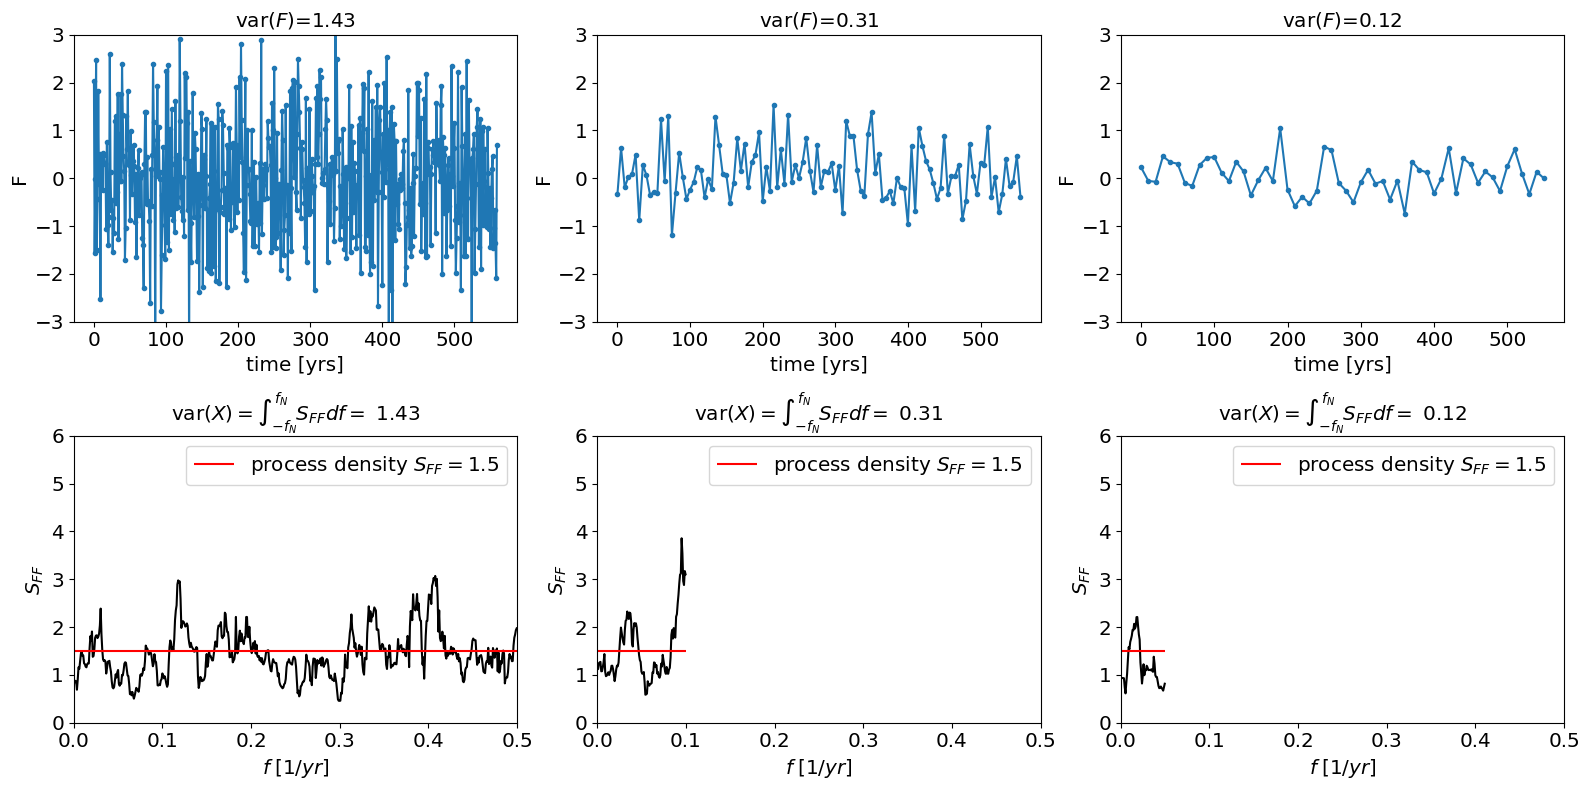

In [69]:
## 

# Fix the Spectral Variance Density sf^2
specdens=1.5;

# A vector of three different sampling intervals
dt_vec=[1,5,10]

# Total Simulation time
T_total=7*4*20;

#set up figure
plt.subplots(2,3,figsize=[16,8])

for i_dt in range(3):
    
    #sampling interval
    dt=dt_vec[i_dt]
    #time vector
    t=np.arange(0,T_total,dt)
    
    #total number of points:
    N=int(T_total/dt);

    # normalize density of F by \sqrt(dt). Not that spec
    var_F=specdens/dt
    sigma_F=np.sqrt(var_F)
    
    #simulate a white noise process:
    F=stats.norm.rvs(loc=0,scale=sigma_F,size=N);

    #compute the spectrum
    out=mtspec.MTSpec(F,nw=4,dt=dt,kspec=0,iadapt=0)
    freq=out.freq
    S_FF =out.spec
    S_FF=S_FF[freq>=0]
    freq=freq[freq>=0]
    
    plt.subplot(2,3,i_dt+1)
    plt.plot(t,F,'.-')
    
    plt.title(r'var$(F)$='+str(round(np.var(F),2)))
    plt.xlabel('time [yrs]')
    plt.ylabel('F')
    plt.ylim(-3,3)
    

    plt.subplot(2,3,i_dt+4)
    plt.plot(freq,S_FF,'k')
    plt.hlines(specdens,0,np.max(freq),color='r',label=r'process density $S_{FF}=$'+str(specdens))
    
    plt.title(r'var$(X)=\int_{-f_N}^{f_N} S_{FF}df=$ '+str(round(np.var(F),2)))
    plt.ylabel(r'$S_{FF}$')
    plt.xlabel(r'$f\; [1/yr]$')
    plt.ylim(0,6)
    plt.xlim(0,0.5)
    plt.legend()

plt.tight_layout()



There are a few other alternatives, 

### Alternative: Fixing $\sigma_{F}$ ($\Delta t$ is sampling time)

A second option for simulating a Hasselmann model is to set $\sigma_{F}$,
i.e the variance of the time-domain vector $F(t_{n})$. This might
seem the easiest version, since $\sigma_{F}$ is what we actually
provide python when drawing saples from a random vector. However,
in this scenario, the spectral density of $F$ will change if we change
$\Delta t$. 

A scenario where a white noise process has the same variance regardless
of time-step is (more-or-less) equivalent to plucking data points
at a time-step $\Delta t$. For example, if we compare a dataset with
$\Delta t=1$ day and one with $\Delta t=1$ month and they have the
same variance, this is as if the data that is collected every month
is actually just daily data collected only day per month. 

In this case, the power spectral density we would estimate for $F$
is $\hat{\tilde{s}}_{F}^{2}=\sigma_{F}^{2}\Delta t$. So as we increase
the time-step, we would get higher spectral densities. 

A more realistic interpretation is that the spectral power at frequencies higher
than the highest accessible frequency $f_{N}$ is getting aliased
back into our spectral estimate between $-f_{N}$ and $f_{N}$

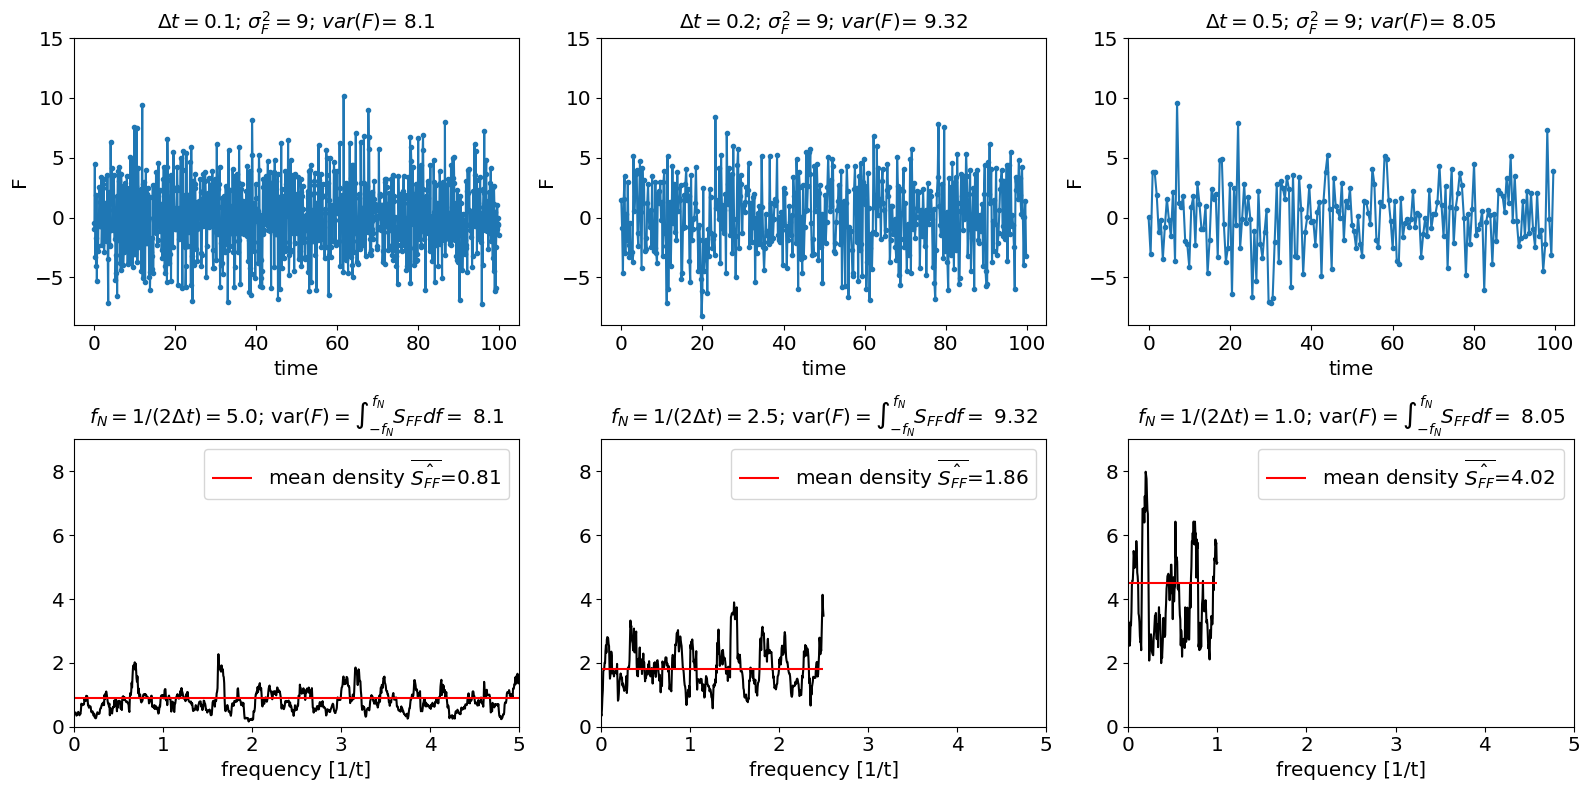

In [113]:
# A vector of three different sampling intervals
dt_vec=[0.1,0.2,0.5]

# Total Simulation time
T_total=100;


#standard deviation sigma_f of the discrete white noise proces 
# var(F) = sigma_F^2
sigma_F=3;


#set up figure
plt.figure(figsize=[16,8])

for i_dt in range(3):
    
    #sampling interval
    dt=dt_vec[i_dt]
    #time vector
    t=np.arange(0,T_total,dt)
    
    #total number of points:
    N=int(T_total/dt);

    #simulate a white noise process:
    F=stats.norm.rvs(loc=0,scale=sigma_F,size=N);

    #compute the spectrum
    out=mtspec.MTSpec(F,nw=4,dt=dt,kspec=0)
    freq=out.freq
    S_FF =out.spec
    S_FF=S_FF[freq>=0]
    freq=freq[freq>=0]
    
    plt.subplot(2,3,i_dt+1)
    plt.plot(t,F,'.-')
    plt.title(r'$\Delta t=$'+str(dt)+r'; $\sigma_F^2=$'+str(round(sigma_F**2))+'; $var(F)$= '+str(round(np.var(F),2)))
    plt.ylim(-9,15)
    plt.xlabel('time')
    plt.ylabel('F')

    plt.subplot(2,3,i_dt+3+1)
    plt.plot(freq,S_FF,'k')
    plt.hlines(sigma_x**2*dt,0,np.max(freq),color='r',label=r'mean density $\overline{\hat{S_{FF}}}$='+str(round(np.mean(S_FF),2)))
    plt.title(r'$f_N=1/(2\Delta t)=$'+str(round(np.max(freq),2))+r'; var$(F)=\int_{-f_N}^{f_N} S_{FF}df=$ '+str(round(np.var(F),2)))
    plt.ylim(0,9)
    plt.xlim(0,5)
    plt.xlabel('frequency [1/t]');
    plt.legend()
plt.tight_layout()


### Alternative: Small $\Delta t$ then averaging

A third, more realistic move would be to use to different timescales
to simulate the fact that we are taking discrete averages of a continuous
process. We would first choose a very small numerical time-step $\Delta t_{num}$
at which to discretize the continuous Hasselmann equation, and assume
that the forcing spectrum is zero at frequencies higher than $f=1/\left(2\Delta t_{N}\right).$
We would then take block averages of larger $\Delta t$ intervals

Below I simulate a model using a numerical time-step of $\Delta t_{num}=1$ meant to represent, for example, using a daily resolution, then take averages of $\Delta t=7$ days and $\Delta t=28$ days to represent using weekly or monthly averaged data. 

Notice that this scenario ends up being very similar to the first proposed way, of assuming the spectral density $S_FF$ is zero at frequencies higher than the Nyquist frequency. This is because time-averaging is a form of a low-pass filter. In fact, moving average and sampling imparts a slightly different spectrum than a pure low-pass filter that sets all spectral power to zero above $1/(2\Delta t)$ and keeps them the same at lower frequencies. But the details of low-pass filtering go beyond the scope of these notes. 

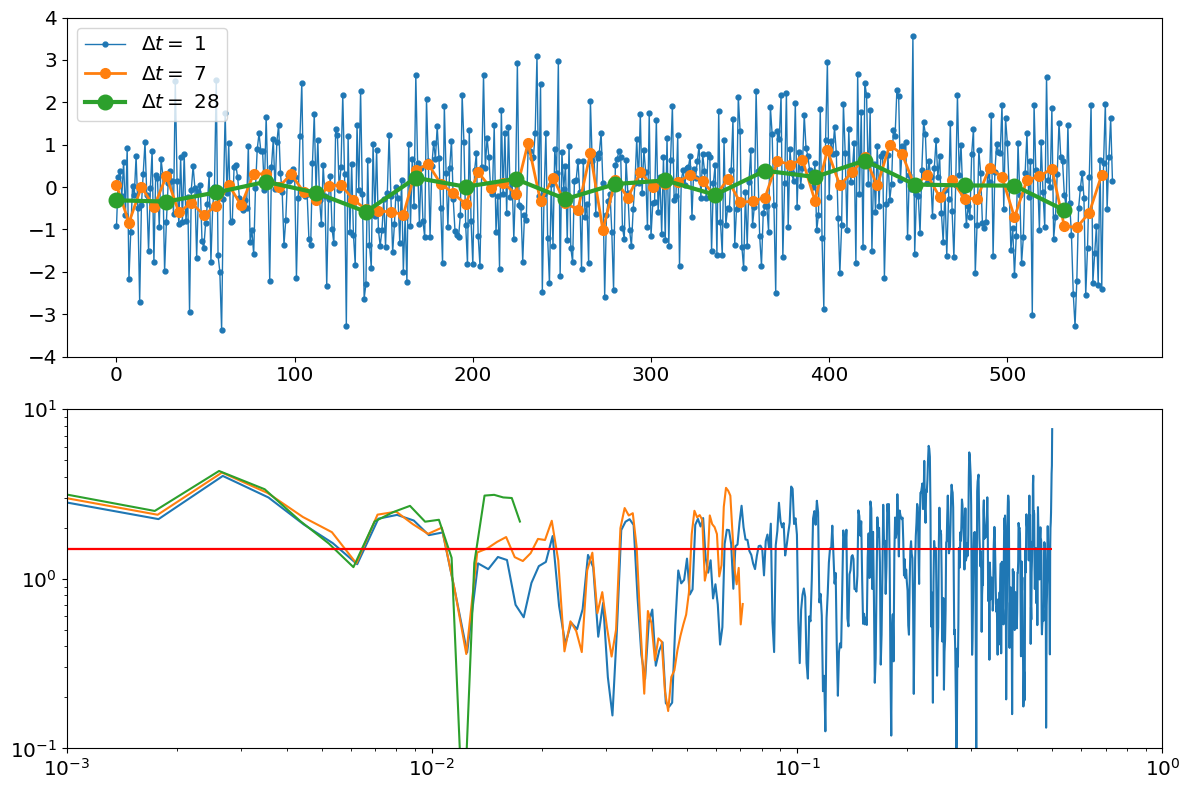

In [112]:
# Spectral density
specdens=1.5;

# original sampling interval (time-step)
dt_num=1

# Total Simulation time
T_total=7*4*20;

N=int(T_total/dt_num);

# A vector of three different sampling intervals
dt_vec=[1,7,7*4]

#set up figure
plt.subplots(2,1,figsize=[12,8])

#simulate one process
var_F=specdens/dt_orig
sigma_F=np.sqrt(var_F);
F_orig=stats.norm.rvs(loc=0,scale=sigma_F,size=N);


for i_dt in range(3):
    
    #take averages of lenth dt
    dt=dt_vec[i_dt]

    #how many samples go in an average?
    dn=dt/dt_orig
    
    #locs=np.arange(0,N,dn).astype('int')
    #coarse time vector
    t=np.arange(0,T_total,dt_vec[i_dt])
    
    #take block averages
    F=np.reshape(F_orig,[int(N/dn),int(dn)]).mean(axis=1); 

    #compute the spectrum
    out=mtspec.MTSpec(F,nw=1.5,dt=dt,kspec=0,iadapt=0)
    freq=out.freq
    S_FF=out.spec
    S_FF=S_FF[freq>=0]
    freq=freq[freq>=0]
    
    plt.subplot(2,1,1)
    plt.plot(t,F,'.-',linewidth=i_dt+1,markersize=7*(i_dt+1),label=r'$\Delta t=$ '+str(dt))
    plt.ylim(-4,4)
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(freq,S_FF)
    plt.hlines(specdens,0,np.max(freq),color='r',label=r'process $S_{ff}$')
    plt.ylim(1E-1,1E1)
    plt.xlim(1E-3,1)
    plt.yscale('log')
    plt.xscale('log')
plt.tight_layout()

# 4. Theoretical Spectra
We now have everythign in place to theoretically compute the spectrum
of Hasselmann-type models. 

## Power Spectrum of the standard Hasselmann Model.

Let's first solve for the theoretical spectrum of a Hasselmann model,
and compare it with a simulation of the Hasselmann model using a time-step
$\Delta t$. Remember, the Hasselmann model is

$$
C\frac{dT}{dt}=-\lambda T+F
$$

where $F$ is white noise, at least at frequencies higher than the
sampling frequency $\left|f\right|<f_{N}=1/\left(2\Delta t\right)$.

The power spectrum of the Hasselmann model can be solved for by taking
the Fourier Transform of the differential equation:

$$
i\omega C\tilde{T}\left(\omega\right)=-\lambda\tilde{T}\left(\omega\right)+\tilde{F}\left(\omega\right)
$$

$$
\tilde{T}\left(\omega\right)=\frac{\tilde{F}\left(\omega\right)}{\lambda+i\omega C}
$$

$$
\tilde{T}\left(\omega\right)=\frac{1}{\lambda}\frac{\tilde{F}\left(\omega\right)}{1+i\omega\tau_{0}}
$$

The spectrum can be computed as:

$$
S_{TT}\left(\omega\right)=\left\langle \tilde{T}\left(\omega\right)\tilde{T}\left(\omega\right)^{*}\right\rangle =\left\langle \frac{1}{\lambda}\frac{\tilde{F}\left(\omega\right)}{1+i\omega\tau_{0}}\frac{1}{\lambda}\frac{\tilde{F}^{*}\left(\omega\right)}{1-i\omega\tau_{0}}\right\rangle =\frac{1}{\lambda^{2}}\frac{\left\langle \tilde{F}\left(\omega\right)\tilde{F}^{*}\left(\omega\right)\right\rangle }{1+\omega^{2}\tau_{0}^{2}}
$$

$$
S_{TT}\left(\omega\right)=\frac{S_{FF}\left(\omega\right)}{\lambda^{2}}\frac{1}{1+\omega^{2}\tau_{0}^{2}}
$$

Using the fact that the a white-noise process has a constant spectral
variance density:

$$
S_{FF}\left(\omega\right)=\tilde{s}_{F}^{2}
$$

we have the spectrum of a Hasselmann model forced with white noise. 

$$
S_{TT}\left(\omega\right)=\frac{\tilde{s}_{F}^{2}}{\lambda^{2}}\frac{1}{1+\omega^{2}\tau_{0}^{2}}=\frac{\tilde{s}_{F}^{2}}{\lambda^{2}+\omega^{2}C^{2}}
$$

If we want to check this spectrum against a numerical simulation where
we used a time-step of $\Delta t$ and set a variance $\sigma_{F}$
for the forcing vector $F_{n}$, we get:

$$
\boxed{S_{TT}\left(\omega\right)=\frac{\sigma_{F}^{2}\Delta t}{\lambda^{2}}\frac{1}{1+\omega^{2}\tau_{0}^{2}}=\frac{\sigma_{F}^{2}\Delta t}{\lambda^{2}+\omega^{2}C{}^{2}}}
$$

Writing it in this way is useful if, say, we want to model the spectrum
of monthly surface temperatures as a function of the variance of monthly
variations in surface heat flux forcing

## Asymptotic behaviour

In the limit of high frequencies (short time-scales): $\omega\gg\tau_{0}$.
i.e. $f\gg\frac{1}{2\pi\tau_{0}}$ the dominant balance in the denominator
becomes $\omega^{2}\tau_{0}^{2}\gg1$ and the power spectrum asymptomes
to $S_{TT}\sim\frac{\tilde{s}_{F}^{2}}{\lambda^{2}\tau_{0}^{2}}\frac{1}{\omega^{2}}$
which obbeys a power law scaling of $S_{TT}\sim f^{-2}$ or $\omega^{-2}$. 

In the limit of low frequencies (long time-scales): $\omega\ll\tau_{0}$.
i.e. $f\ll\frac{1}{2\pi\tau_{0}}$ , the dominant balance is reversed,
with $1\gg\omega\tau_{0}^{2}$ and the spectrum asymptotes to: $S_{TT}\left(\omega\right)\sim\frac{\tilde{s}_{F}^{2}}{\lambda^{2}\tau_{0}^{2}}$ 

As you can see from the figure there are essentially two pieces of
information in the spectrum: the spectral density at which it tapers
of, which gives us an estimate for $\tilde{s}_{F}^{2}/\lambda^{2}$
and the characteristic time-scale $\tau_{0}$, identifiable from the
roll-off frequency. Only having information about the power-spectrum
of temperature does not allow us to constrain both the variance of
the forcing, $\sigma_{F}^{2}$ \emph{and }the feedback $\lambda$,
only their ratio.

Text(0, 0.5, '$S_{TT}$')

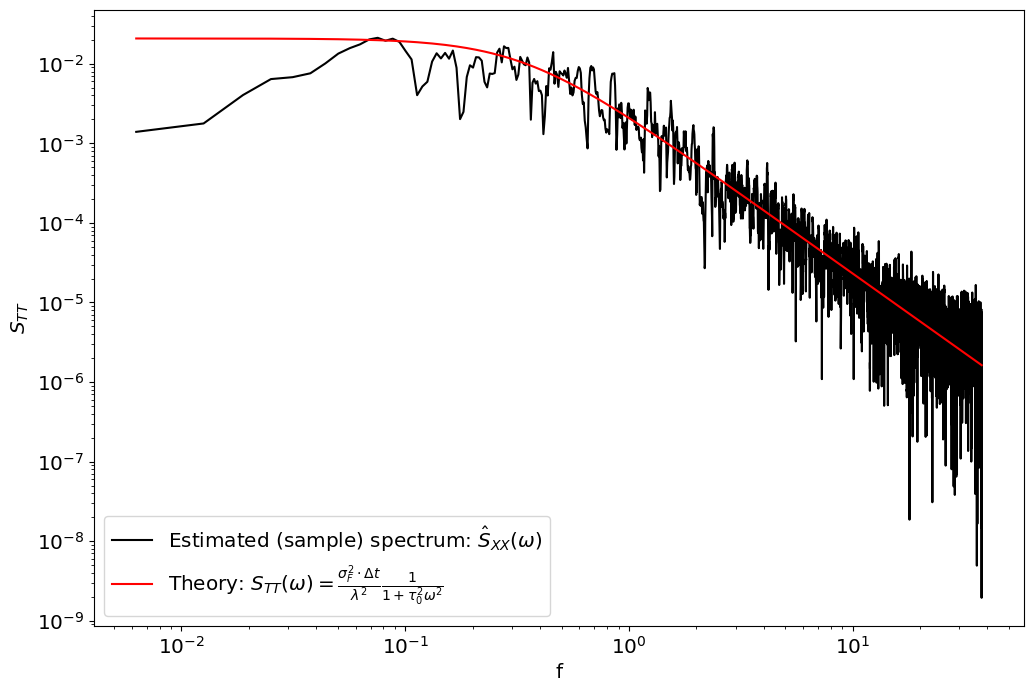

In [3]:
plt.figure(figsize=[12,8])

#physical parameters:
sigma_F=1;
tau=3;
l=2;
C=tau*l;

# numerical parameters 
dt=1/12
T=500

#compute other required variables
t=np.arange(0,T,dt)
N=len(t)
phi=1-(dt*l/C);

#white noise forcing 
F=stats.norm.rvs(loc=0,scale=sigma_F,size=N)
eps=F*dt/C

#integrate
T=np.zeros(N)
for j in range(1,N):
    T[j]=phi*T[j-1]+eps[j]

#compute spectrum
out=mtspec.MTSpec(T,nw=2,dt=dt,kspec=3)
f=out.freq
S_TT=out.spec
S_TT=S_TT[f>0]
f=f[f>0]

#theory
S_TT_theory=sigma_F**2*dt/(l**2) * 1/(1+(tau**2)*(2*np.pi*f)**2)

#plot
plt.plot(2*np.pi*f,S_TT,'k',label=r'Estimated (sample) spectrum: $\hat S_{XX}(\omega)$')
plt.plot(2*np.pi*f,S_TT_theory,'r',label=r'Theory: $S_{TT}(\omega)=\frac{\sigma_{F}^{2}\cdot\Delta t}{\lambda^{2}}\frac{1}{1+\tau_{0}^{2}\omega^{2}}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'f')
plt.ylabel(r'$S_{TT}$')

In practice we may also have measurements of the net heat flux $Q=-\lambda T+F$.
The spectrum of $Q$ will be:

$$
\tilde{Q}\left(\omega\right)=-\frac{1}{1+i\omega\tau_{0}}\tilde{F}\left(\omega\right)+\tilde{F}\left(\omega\right)
$$

$$
\tilde{Q}\left(\omega\right)=\frac{i\omega\tau_{0}}{1+i\omega\tau_{0}}\tilde{F}\left(\omega\right)
$$

$$
S_{QQ}\left(\omega\right)=\tilde{s}_{F}^{2}\frac{\omega^{2}\tau_{0}^{2}}{1+\omega^{2}\tau_{0}^{2}}
$$

Between the estimate of two spectra, $S_{TT}$ and $S_{QQ}$, we now
have enough pieces of information to constrain all of $\lambda,\tau_{0}$
and $\sigma_{F}^{2}$. 


Text(0, 0.5, '$S_{QQ}$')

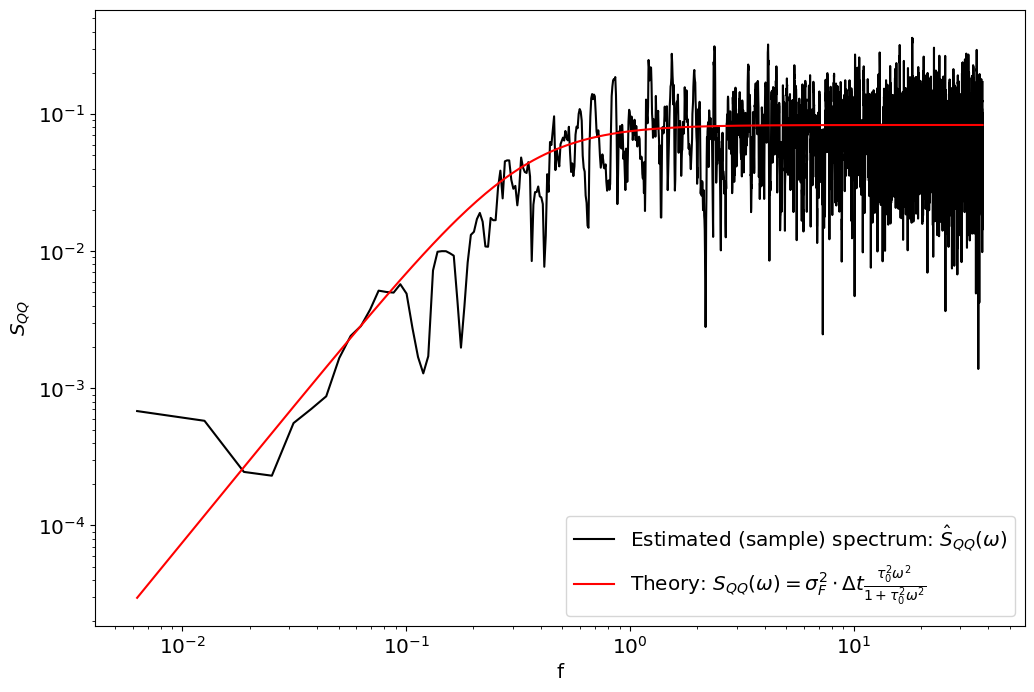

In [4]:
#compute spectrum
Q=-l*T+F
out_Q=mtspec.MTSpec(Q,nw=2,dt=dt,kspec=3)
f=out_Q.freq
S_QQ=out_Q.spec
S_QQ=S_QQ[f>0]
f=f[f>0]

#theory
S_QQ_theory=sigma_F**2*dt * ((tau**2)*(2*np.pi*f)**2)/(1+(tau**2)*(2*np.pi*f)**2)

#plot
plt.plot(2*np.pi*f,S_QQ,'k',label=r'Estimated (sample) spectrum: $\hat S_{QQ}(\omega)$')
plt.plot(2*np.pi*f,S_QQ_theory,'r',label=r'Theory: $S_{QQ}(\omega)=\sigma_{F}^{2}\cdot\Delta t\frac{\tau_{0}^{2}\omega^{2}}{1+\tau_{0}^{2}\omega^{2}}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('f')
plt.ylabel(r'$S_{QQ}$')


## Cross Spectrum of the standard Hasselmann Model

We can also can estimate cross power spectral density, such as $S_{QT}$. 

$$
\begin{cases}
C\frac{dT}{dt}=-\lambda T+F\\
Q=-\lambda T+F
\end{cases}
$$

$$
\begin{cases}
\tilde{T}\left(\omega\right)=\frac{1}{\lambda}\frac{1}{1+i\omega\tau_{0}}\tilde{F}\left(\omega\right)\\
\tilde{Q}\left(\omega\right)=-\frac{1}{1+i\omega\tau_{0}}\tilde{F}\left(\omega\right)+\tilde{F}\left(\omega\right)
\end{cases}
$$

$$
\begin{cases}
\tilde{T}\left(\omega\right)=\frac{1}{\lambda}\frac{1}{1+i\omega\tau_{0}}\tilde{F}\left(\omega\right)\\
\tilde{Q}\left(\omega\right)=\frac{i\omega\tau_{0}}{1+i\omega\tau_{0}}\tilde{F}\left(\omega\right)
\end{cases}
$$

$$
S_{QT}=\left\langle QT\right\rangle =\frac{\tilde{s}_{F}^{2}}{\lambda}\frac{i\omega\tau_{0}}{1+\omega^{2}\tau_{0}^{2}}
$$

The relation between two variables is also often estimated as the
transfer function: 

$$
H_{QT}=\frac{S_{QT}}{S_{TT}}=\lambda i\omega\tau_{0}
$$




## A model with two different sources of forcing:

Now consider a Hasselmann model with two different sources of forcing
and feedbacks, modelling the interaction of the mixed layer with both
the atmosphere and the ocean. For starteres, let's assume that the
mixed layer temperature does not feed-back onto the ocean:

$$
\begin{cases}
C\frac{dT}{dt}=-\lambda_{a}T+F_{a}+F_{o} & \text{mixed layer energy budget}\\
Q_{a}=-\lambda_{a}T+F_{a} & \text{atmospheric heat fluxes}
\end{cases}
$$

$$
\tilde{T}\left(\omega\right)=\frac{1}{\lambda_{a}}\frac{\tilde{F}_{a}\left(\omega\right)+\tilde{F}_{o}\left(\omega\right)}{1+i\omega\tau_{0}}
$$

$$
S_{TT}=\left\langle \tilde{T}\left(\omega\right)\tilde{T}^{*}\left(\omega\right)\right\rangle 
$$

Using the linearity property of the angle bracket operator, the above
equation can be written as:

$$
S_{TT}=\frac{1}{\lambda_{a}}\frac{\left\langle \tilde{F}_{a}\tilde{F}_{a}^{*}\right\rangle +\left\langle \tilde{F}_{a}\tilde{F}_{o}^{*}\right\rangle +\left\langle \tilde{F}_{o}\tilde{F}_{a}^{*}\right\rangle +\left\langle \tilde{F}_{o}\tilde{F}_{o}^{*}\right\rangle }{1+\omega^{2}\tau_{0}^{2}}
$$

Since $F_{a}$and $F_{o}$ are assumed to be white noise and independent
processes, $\left\langle \tilde{F}_{a}\tilde{F}_{o}^{*}\right\rangle =\left\langle \tilde{F}_{o}\tilde{F}_{a}^{*}\right\rangle =0$,
and the equation simplifies to:

$$
S_{TT}=\frac{1}{\lambda_{a}}\frac{\tilde{s}_{F_{a}}^{2}+\tilde{s}_{F_{o}}^{2}}{1+\omega^{2}\tau_{0}^{2}}
$$

$$
Q=-\lambda_{a}\tilde{T}\left(\omega\right)+F_{a}=-\frac{\tilde{F}_{a}\left(\omega\right)+\tilde{F}_{o}\left(\omega\right)}{1+i\omega\tau_{0}}+\tilde{F}_{a}
$$

$$
=\frac{i\omega\tau_{0}\tilde{F}_{a}\left(\omega\right)-\tilde{F}_{o}\left(\omega\right)}{1+i\omega\tau_{0}}
$$
With spectrum

$$
S_{QQ}=\left\langle QQ^{*}\right\rangle =\frac{1}{1+\omega^{2}\tau_{0}^{2}}\frac{\omega^{2}\tau^{2}\left\langle \tilde{F}_{a}\tilde{F}_{a}^{*}\right\rangle +i\omega\tau_{0}\left\langle \tilde{F}_{a}\tilde{F}_{o}^{*}\right\rangle +i\omega\tau_{o}\left\langle \tilde{F}_{o}\tilde{F}_{a}^{*}\right\rangle +\left\langle \tilde{F}_{o}\tilde{F}_{o}^{*}\right\rangle }{1+\omega^{2}\tau_{0}^{2}}
$$

$$
S_{TT}=\frac{\omega^{2}\tau_{0}^{2}\tilde{s}_{F_{a}}^{2}+\tilde{s}_{F_{o}}^{2}}{1+\omega^{2}\tau_{0}^{2}}
$$
and cross spectrum:

$$
S_{QT}=\left\langle QT\right\rangle =\frac{1}{\lambda_{a}}\frac{1}{1+\omega^{2}\tau_{0}^{2}}\frac{i\omega\tau_{0}\left\langle \tilde{F}_{a}\tilde{F}_{a}^{*}\right\rangle +i\omega\tau_{0}\left\langle \tilde{F}_{a}\tilde{F}_{o}^{*}\right\rangle -\left\langle \tilde{F}_{o}\tilde{F}_{a}^{*}\right\rangle -\left\langle \tilde{F}_{o}\tilde{F}_{o}^{*}\right\rangle }{1+\omega^{2}\tau_{0}^{2}}
$$

$$
S_{QT}=\frac{1}{\lambda_{a}}\frac{i\omega\tau_{0}\tilde{s}_{F_{a}}^{2}-\tilde{s}_{F_{o}}^{2}}{1+\omega^{2}\tau_{0}^{2}}
$$

leading to the transfer function:

$$
H_{QT}=\frac{S_{QT}}{S_{TT}}=\lambda_{a}\frac{i\omega\tau_{0}\tilde{s}_{F_{a}}^{2}-\tilde{s}_{F_{o}}^{2}}{\tilde{s}_{F_{a}}^{2}+\tilde{s}_{F_{o}}^{2}}
$$




## To do:

### Ocean and atmospheric heat fluxes and forcing

$$
\begin{cases}
C\frac{dT}{dt}=-\lambda_{a}T-\lambda_{0}T+F_{a}+F_{o} & \text{mixed layer energy budget}\\
Q_{a}=-\lambda_{a}T+F_{a} & \text{atmospheric heat fluxes}\\
Q_{o}=-\lambda_{o}T+F_{o} & \text{ocean heat fluxes}
\end{cases}
$$

Compute the power spectra and cross-spectra:

$$
S_{TT},S_{Q_{a}Q_{a}},S_{Q_{o}Q_{o}},S_{Q_{o}T},S_{Q_{a}T}
$$

as a function of parameters $\theta=\left[C,\lambda_{a},\lambda_{o},\tilde{s}_{F_{a}},\tilde{s}_{F_{o}}\right]$
. Note that since there are two feedbacks, we can no longer define
a single characteristic time-scale $\tau_{0}$, so we should write
these in terms of $C$. 

### Red noise ocean process

Now let's assume that ocean forcing is not white, but red. in other
words, 

$$
S_{F_{o}F_{o}}=\tilde{s}_{\eta}\frac{1}{1+\omega^{2}\tau_{1}^{2}}
$$
What are the spectra? 
$$
S_{TT},S_{Q_{a}Q_{a}},S_{Q_{o}Q_{o}},S_{Q_{o}T},S_{Q_{a}T}
$$
Simulate these numerically to check that the theoretical solutions
are accurate. Try different values of $\tau_{1}$ relative to $C/\lambda_{a}$
and $C/\lambda_{o}$. Note that you will need to simulate a red noise
forcing. You can do that by assuming that $F_{o}$ is itself a Hasselmann
model:

$$
\tau\frac{dF_{o}}{dt}=-F_{o}+\eta
$$
where $\eta$ is white noise. 